<a href="https://colab.research.google.com/github/SilverSurferClash/Sales_analysis/blob/main/Import_clean_SFDC_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
#!pip freeze > requirements.txt

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)
#Use option to round floats to two decimals
#pd.set_option('display.float_format',  '{:,.2f}'.format)
# Use option to display $ dollars
#pd.set_option('display.float_format', '${:.2f}'.format)

# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('notebook')


# Enable multiple cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')              


In [240]:
os.getcwd()

'/content/drive/My Drive/Colab_Notebooks/Sales_Analysis'

In [241]:
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Sales_Analysis")

#### Helper function

In [242]:
#Create a function that use the second element if the list has a length of 2 other return unknown

def clean_up_account(list_of_names):

  if len(list_of_names) == 2:
    return list_of_names[1]
  else:
    return list_of_names[0]


In [243]:
#Create a function to clean up the Billing type feature


Import helper data

In [244]:
#Import lookup table for countries
lookup_countries = pd.read_excel("./lookup.xlsx", sheet_name = 0)
#Import the data from SFDC as a excel file
import_sfdc = pd.read_excel("./All Data EUAA-2022-10-25-12-29-00.xlsx", sheet_name = 0, 
                            skiprows = 10)
#Create dictionairy for maping the lookup value
country_dict = dict(zip(lookup_countries["Reporting_Country_short"], lookup_countries["Account_Reporting_Country"]))
#Import lookup table for countries
lookup_type = pd.read_excel("./lookup.xlsx", sheet_name = "Type")
#Create dictionairy for maping the lookup values for LIMS ID
type_dict = dict(zip(lookup_type["LIMS Project ID"], lookup_type["Type"]))

#Import lookup Cancer Type
lookup_cancer_type = pd.read_excel("./lookup.xlsx", sheet_name = "Cancer_type")
cancer_type_dict = dict(zip(lookup_cancer_type["Old"], lookup_cancer_type["New"]))

#Inport lookun Billing_type - Needs further work
#lookup_billing_type = pd.read_excel("./lookup.xlsx", sheet_name = "Billing_type")
#billing_type_dict = dict(zip(lookup_billing_type["Billing Type"], lookup_billing_type["Billing Type.1"]))


In [245]:
#Identify which LIMS id are not in the lookup
unique_LIMS_id = list(set(import_sfdc["LIMS Project ID"]))
unique_lookup_id = list(set(lookup_type["LIMS Project ID"]))
list(set(unique_LIMS_id) - set(unique_lookup_id ))

[nan, 'GAP_04', 'AZN_test_96', 'RHI_04', 'OCT_1R', 'JNS_01', 'GAP_09']

In [246]:
#import_sfdc.info()

#### Import and clean up the data from SFDC

In [247]:

#Remove the first two columns
import_sfdc = import_sfdc.drop(["Unnamed: 0", "Unnamed: 2"], axis = 1)
#Drop the last five rows
import_sfdc = import_sfdc.iloc[0:-5]
#Cast Date Received to datetime object 
import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
#Clean up the type column
import_sfdc["Type"] = import_sfdc["LIMS Project ID"].map(type_dict)

#Replace the two letter country code with the full country name
import_sfdc["Reporting Country"] = import_sfdc["Reporting Country"].map(country_dict)
#Clean up the cancer types and reduce number of categories
import_sfdc["Cancer Type"] = import_sfdc["Cancer Type"].map(cancer_type_dict)
#Clean up the Account column by removing all strings before the ":"
import_sfdc["Account: Account Name"] = import_sfdc.loc[:, "Account: Account Name"].str.split(":").apply(clean_up_account)
#Clean up the Billing type column 
#import_sfdc["Billing Type"] = import_sfdc["Billing Type"].map(billing_type_dict)
#import_sfdc.tail(6)

# Set the date recieved as date index
import_sfdc = import_sfdc.set_index("Date Received")

#import_sfdc.info()

In [248]:
import_sfdc["LIMS Project ID"]

Date Received
2019-11-25    AMG_01
2019-11-26    AMG_01
2019-11-29    AMG_01
2019-11-30    AMG_01
2019-11-30    AMG_01
               ...  
2021-01-04    VLT_01
2021-01-11    VLT_01
2021-01-11    VLT_01
2021-01-15    VLT_01
2021-01-20    VLT_01
Name: LIMS Project ID, Length: 14977, dtype: object

In [249]:
#Create date and time features

#Create a year, month, quarter variable
import_sfdc["Month"] = import_sfdc.index.month
import_sfdc["Year"] = import_sfdc.index.year
import_sfdc['Quarter'] = import_sfdc.index.quarter
#Other feature engineering based on feature analysis below
import_sfdc['Sales'] = 1

#create a Year Month columns
import_sfdc['Year_Month'] = import_sfdc.index.to_period('M')
#Cast the Year_Month column to a str
import_sfdc['Year_Month'] = import_sfdc['Year_Month'].astype(str)
import_sfdc['Year_Month'] = pd.to_datetime(import_sfdc['Year_Month'])
#Cast some features to categorical
#df['Reporting_Country'] = df['Reporting_Country'].astype('category')
import_sfdc['Type'] = import_sfdc['Type'].astype('category')


In [250]:
#import_sfdc.sample(5)

#### Explore the data

In [251]:
#import_sfdc["Reporting Country"].value_counts()

In [252]:
#import_sfdc.Type.value_counts()

In [253]:
#import_sfdc.info()

In [254]:
#import_sfdc["Billing Type"].value_counts()

In [255]:
#import_sfdc["Test Type"].value_counts()

In [256]:
#import_sfdc["Cancer Type"].value_counts()

In [257]:
#import_sfdc['Billing Type'].value_counts()

In [323]:
# Import the revenue data

revenue_import = pd.read_excel("./Sales_Volume_EUAA_Analytics.xlsx", skiprows = 28)
revenue_import = revenue_import.iloc[:, 1:12]
#revenue_import.columns.tolist()
revenue_import['Accession #']= revenue_import['Accession #'].fillna("missing") 
revenue_import = revenue_import[revenue_import['Accession #'].str.startswith("A0")]
#revenue_import.info()

In [324]:
#revenue_import.columns.tolist()

In [291]:
revenue_col_list = ['Accession #', 'Invoiced Ammount','Expected Amount $','Invoiced/In Prg.', 'FOC']

In [292]:
#Define the clean up function for the FOC columns
def foc_clean_up(value):

  if value == "x":
    return "Free"

  elif value == "x (COV19)":
     return "Free"
  elif value == "x (Christie)":
    return "Free"
  else: 
    return value

#Clean up Docuten

def docuten_clean_up(value):

  if value == "y (DOCUTEN)":
    return "Free"

  else: 
    return value

#Clean up the revenue data and extract the free of charge information
revenue_import_clean = revenue_import.loc[:, revenue_col_list].copy()
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].fillna("Paid")
revenue_import_clean.head()

,Accession #,Invoiced Ammount,Expected Amount $,Invoiced/In Prg.,FOC
0,A0198807,0.0,0.0,NaN,x
1,A0196311,0.0,0.0,NaN,x
3,A0196102,3490.0,3490.0,NaN,Paid
4,A0195058,3490.0,3490.0,NaN,Paid
6,A0196290,3490.0,3490.0,NaN,Paid


In [293]:
revenue_import_clean["FOC"].value_counts()

Paid            2944
x                625
x (COV19)         84
x (Christie)       6
                   1
Name: FOC, dtype: int64

In [301]:
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].apply(foc_clean_up).astype("category")

In [302]:
revenue_import_clean["FOC"].value_counts()

Paid    2944
Free     715
           1
Name: FOC, dtype: int64

In [303]:
#Join the two dataframes

df_merged = import_sfdc.merge(revenue_import_clean[["Accession #", "FOC"]], how='inner', on = "Accession #")
df_merged.sample(3)

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,Month,Year,Quarter,Sales,Year_Month,FOC
217,A0235000,UNITED KINGDOM,Self-Pay Patient,GHI_01,Genesis Care Nottingham,Santhanam Sundar,2/23/2020,Guardant 360,NaN,Commercial,2,2020,1,1,2020-02-01,Paid
1520,A0320631,BRAZIL,Distributors : ROW,GHI_01,Diagnosticos da America S.A.,Cristovam Scapulatempo Neto,1/20/2021,Guardant 360,Breast,Commercial,1,2021,1,1,2021-01-01,Paid
1619,A0328098,SPAIN,Distributors : ROW,GHI_01,Clinica Universidad de Navarra-Madrid,Jesus Corral,2/17/2021,Guardant 360,NaN,Commercial,2,2021,1,1,2021-02-01,Paid


In [268]:
# Startinf dataframe for all years
import_sfdc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14977 entries, 2019-11-25 to 2021-01-20
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            14977 non-null  object        
 1   Reporting Country      14977 non-null  object        
 2   Billing Type           14949 non-null  object        
 3   LIMS Project ID        14977 non-null  object        
 4   Account: Account Name  14977 non-null  object        
 5   Contact: Full Name     14977 non-null  object        
 6   Final Report Date      13479 non-null  object        
 7   Test Type              14977 non-null  object        
 8   Cancer Type            5343 non-null   object        
 9   Type                   14873 non-null  category      
 10  Month                  14977 non-null  int64         
 11  Year                   14977 non-null  int64         
 12  Quarter                14977 non-null  int6

In [304]:
#Cleaned up dataframe included FOC information starting from around 2019
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 0 to 3532
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            3533 non-null   object        
 1   Reporting Country      3533 non-null   object        
 2   Billing Type           3533 non-null   object        
 3   LIMS Project ID        3533 non-null   object        
 4   Account: Account Name  3533 non-null   object        
 5   Contact: Full Name     3533 non-null   object        
 6   Final Report Date      3530 non-null   object        
 7   Test Type              3533 non-null   object        
 8   Cancer Type            1182 non-null   object        
 9   Type                   3533 non-null   category      
 10  Month                  3533 non-null   int64         
 11  Year                   3533 non-null   int64         
 12  Quarter                3533 non-null   int64         
 13  Sal

#### Plotting

In [316]:
#Select the features for the analysis
import_sfdc.columns.to_list()
list_for_country_analysis = ['Accession #',
 'Reporting Country',
 'Type',
 'Sales',
 'Year_Month']

countries_df = import_sfdc.loc[:,list_for_country_analysis ]
#countries_df["Reporting Country"] = countries_df["Reporting Country"].astype('category')
countries_df.sample(3)

,Accession #,Reporting Country,Type,Sales,Year_Month
Date Received,,,,,
2019-05-30,A0170721,SPAIN,GH Trials (Prospective),1,2019-05-01
2022-08-08,A0558097,UNITED KINGDOM,Commercial,1,2022-08-01
2022-09-01,A0570165,SPAIN,Biopharma,1,2022-09-01


In [317]:
#Starting df for plotting
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14977 entries, 2019-11-25 to 2021-01-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        14977 non-null  object        
 1   Reporting Country  14977 non-null  object        
 2   Type               14873 non-null  category      
 3   Sales              14977 non-null  int64         
 4   Year_Month         14977 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [271]:
#Plot the total number of by country over time

In [318]:
#Select the time horizion to analyse
start_date = "2020"
end_date = "2022-08"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries = 6
#Create the dataframe relevant for the time periode which should be analysed
countries_df = countries_df.loc[start_date:end_date].copy()
print(f"The number of samples in this dataframe is {countries_df.shape[0]}")

The number of samples in this dataframe is 11197


In [319]:
#Create a dataframe with just the topx countries by number of tests sold
top_x = countries_df.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries)
top_x_list = top_x.index.tolist()
top_x_sales =countries_df[countries_df['Reporting Country'].isin(top_x_list)]
print(f"The top 5 countries have {top_x_sales.shape[0]} samples which represents {top_x_sales.shape[0]/countries_df.shape[0]:.2%}")

The top 5 countries have 9260 samples which represents 82.70%


In [325]:
#Starting dataframe for plotting with date defined and the number of countries
top_x_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9260 entries, 2020-03-09 to 2021-01-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        9260 non-null   object        
 1   Reporting Country  9260 non-null   object        
 2   Type               9248 non-null   category      
 3   Sales              9260 non-null   int64         
 4   Year_Month         9260 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 371.0+ KB


In [333]:
#Merging the GH trials and LUNAR into ISTs

def merge_ISTs(x):
  if x == "GH Trials (Prospective)":
    return "ISTs"
  elif x == "Lunar":
    return "ISTs"
  else:
    return x

In [341]:
top_x_sales["Type"] = top_x_sales["Type"].map(merge_ISTs)

top_x_sales["Type"].value_counts()

Biopharma     2951
Commercial    2571
ISTs          2034
GAP           1692
Name: Type, dtype: int64

In [344]:
all_countries_by_type = top_x_sales.groupby(['Year_Month', "Type"]).sum().reset_index()
all_countries_by_type.head(3)

,Year_Month,Type,Sales
0,2020-01-01,Biopharma,46
1,2020-01-01,Commercial,51
2,2020-01-01,GAP,37


In [ ]:
#Use relpot for plotting

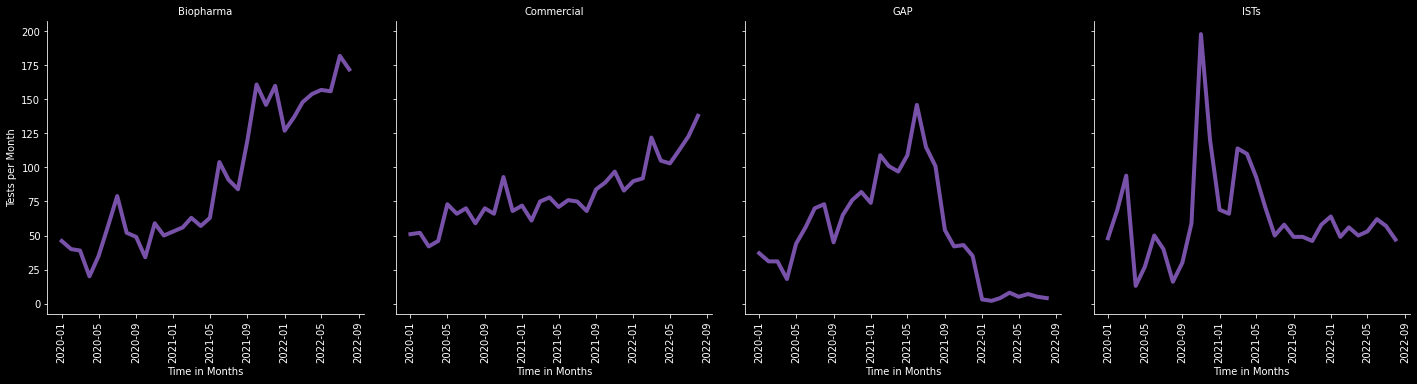

In [360]:
g = sns.relplot(data = all_countries_by_type, x = "Year_Month", y = "Sales", kind = "line", col = "Type", color = "#7851a9", linewidth=4)
g.set_xticklabels(rotation = "90")
g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
plt.show()
#plt.xticks( rotation = "90")


In [314]:
grouped_countries.shape

(2, 3)

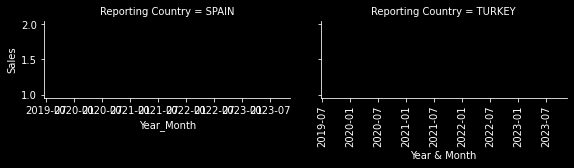

In [311]:

sns.relplot( data = grouped_countries, y = "Sales", x = "Year_Month", kind = "line", 
            hue = "Reporting Country" , col = "Reporting Country",
            col_wrap=3, height=2, aspect=2, legend=False)

plt.xticks( rotation = "90")
plt.ylabel('Monthly Count')
plt.xlabel('Year & Month')



plt.show()

 ## Plots

In [277]:
countries_df = countries_df.drop("Accession #", axis = 1)
countries_df.head()

,Reporting Country,Type,Sales,Year_Month
Date Received,,,,
2020-02-27,BELGIUM,Biopharma,1,2020-02-01
2020-06-01,BELGIUM,Biopharma,1,2020-06-01
2020-03-09,FRANCE,Biopharma,1,2020-03-01
2020-03-09,SWITZERLAND,Biopharma,1,2020-03-01
2020-03-16,SWITZERLAND,Biopharma,1,2020-03-01


#### Use the subplots method

In [282]:
#fig, axes = plt.subplots(2, 3, figsize=(24, 12), sharey = False)

#for col, ax in zip(col_list, axes.flatten()):
 #  sns.lineplot(data =  sandbox, x = "Year_Month", y = "Sales" , hue = "Type", ax = ax)
   #ax.plot(t.index, t[col], hue = "Type" color = "#ae34eb")
  # ax.set_title(col[1])

In [283]:
#fig, axes = plt.subplots(2, 3, figsize=(24, 12), sharey = False)

#for col, ax in zip(col_list, axes.flatten()):
   #sns.lineplot(data =  sandbox, x = "Year_Month", y = "Sales" , hue = "Type", ax = ax)
   #ax.plot(sandbox.index, sandbox[col], color = "#ae34eb")
   #ax.set_title(col[1])